Simple Linear Regression

Importing needed packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl
%matplotlib inline

/home/jupyterlab/conda/envs/python/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Downloading the data

To download the data, we use !Wget to download from IBM object storage

In [3]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2021-03-10 10:59:01--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2021-03-10 10:59:02 (1.80 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



Understanding the data

FuelConsumption.csv

MODELYEAR eg.2014 

MAKE e.g. Acura

MODEL e.g. ILX

VEHICLE CLASS e.g.SUV

ENGINE SIZE e.g.4.7

CYLINDERS e.g.6

TRANSMISSION e.g.A6

FUEL CONSUMPTION IN CITY(L/100 KM) e.g. 9.9

FUEL CONSUMPTION IN HWY(L/100KM) e.g.8.9

FUEL CONSUMPTION IN COMB(L/100KM) e.g.9.2



CO2 EMISSIONS(g/KM) e.g. 182-->LOW-->0

Reading the data in

In [4]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset

df.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Data Exploration

Lets first have a descriptive exploration on our data

In [5]:
# Summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Let us select some features to explore more

In [6]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


We can plot each of these features

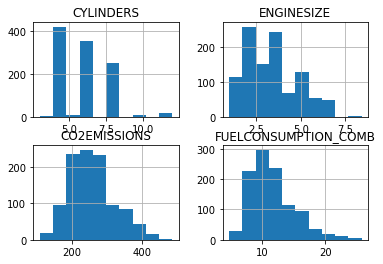

In [7]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()


Now,lets plot each of these features vs the emissions to see how linear is their relation

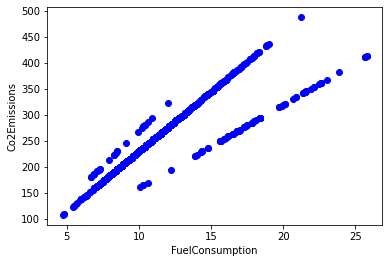

In [8]:
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS,color = "blue")
plt.xlabel("FuelConsumption")
plt.ylabel("Co2Emissions")
plt.show()

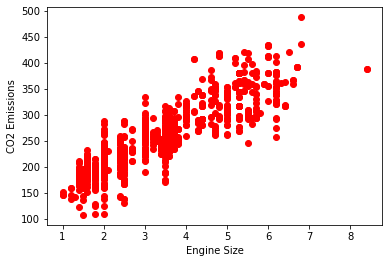

In [9]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color = "red")
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.show()

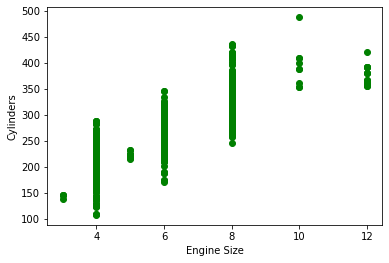

In [10]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS,color = "green")
plt.xlabel("Engine Size")
plt.ylabel("Cylinders")
plt.show()

Creating train and test data sets

Train/Test split involves splitting the dataset into training and testing sets respectively,which are mutually exclusive.After which you train with the 
training set and test with the testing set.This will provide more accurate evaluation on or out of sample accuracy because the testing data set is not part
of the dataset that is used to train the data.It is more realistic for real world problems.

This means that we know the outcome of the each data point in the data set,making it great to test with!And since this data has not been used to train 
the model,the model has no knowledge of the outcome of these data points.So in essence,it is truly an out-of-sample testing.

Lets split our data set into train and test sets,80% of the entire data for training and 20% for testing.We create a mask to select random rows using
np.random.rand() function

In [11]:
msk =np.random.rand(len(df)) < 0.8

In [12]:
msk

array([ True,  True,  True, ...,  True, False, False])

In [13]:
train = cdf[msk]

train.shape

(854, 4)

In [14]:
test = cdf[~msk]
test.shape

(213, 4)

Simple Regression Model

Linear Regression fits linear model with coefficients B = (B1,B2,...Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset and predicted value y that using linear approximation.

Train data distribution

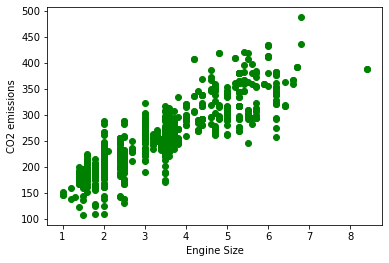

In [15]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color = 'green')
plt.xlabel("Engine Size")
plt.ylabel("CO2 emissions")
plt.show()

Modeling

Use Sklearn package to model data

In [16]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)

#The coefficients
print("The coefficents:",regr.coef_)
print("The intercept:",regr.intercept_)

The coefficents: [[39.12700482]]
The intercept: [124.78216905]


/home/jupyterlab/conda/envs/python/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


As mentioned before,Coefficient and Intercept in the simple linear regression are the parameters of the fitline.Given that it is a simple linear 
regression,with only 2 parameters,and knowing that parameters are the intercept and slope of the line.sklearn can estimate them directly from our data.Notice that all of the data must be available to traverse and calculate the parameters.

Plot outputs

We can plot the fitline over the data

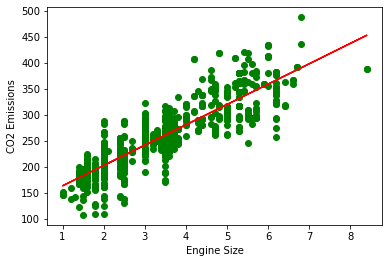

In [17]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color = 'green')
plt.plot(train_x,regr.coef_[0][0] * train_x + regr.intercept_[0],'-r')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.show()


Evaluation

We compare actual values and predicted values to caculate the accuracy of a regression model.Evaluation metrics provide a key role in the development of a model
as it provides insight to areas that require improvement.

There are different model evaluation metrics,let us use MSE here to caculate the accuracy of the model basedon the test set.

- Mean Absolute Error: It is the mean of the absolute value of the errors.This is the easiest of the metrics to understand since it is just average error.
- Mean Squared Error(MSE):Mean Squared Error(MSE) is the mean of the squared error. It's more popular than Mean Absolute Error because the focus is geared more towards large errors.This is due to the squared term exponentially increasing large errors in comparision to smaller errors.
- Root Mean Squared Error(RMSE)
- R-Squared is not an Error,but is a popular metric for accuaracy of your model.It represents how close the data are to the fitted regression line.The higher theR-squared,the better the model fits your data.Best possible score is 1.0 and it can be negative.(because the model can be arbitrarily worse)

In [20]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)
print("Mean absolute error: %.2f" %np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares: %.2f"%np.mean((test_y_ - test_y) ** 2))
print("R2-score : %.2f" %r2_score(test_y_,test_y) )




Mean absolute error: 22.15
Residual sum of squares: 849.32
R2-score : 0.73
